In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns

In [2]:
df = pd.read_csv('/content/loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#**Handling Missing Values**

In [5]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [8]:
df.shape

(480, 13)

# **Encoding the Data**

In [9]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())

Gender
Male      394
Female     86
Name: count, dtype: int64
Married
Yes    311
No     169
Name: count, dtype: int64
Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64
Self_Employed
No     414
Yes     66
Name: count, dtype: int64
Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64
Loan_Status
Y    332
N    148
Name: count, dtype: int64


In [10]:
df.replace({'Gender' : {'Male' : 0 , 'Female' : 1},'Married' : {'Yes' : 0 , 'No' : 1},'Education' : {'Graduate' : 0, 'Not Graduate': 1},'Self_Employed':{'No':0,'Yes':1}},inplace =True)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
df.replace({'Property_Area':{'Semiurban':1,'Urban':2,'Rural':3},'Loan_Status' : {'Y':0,'N':1}}, inplace = True)

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,3,1
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,2,0
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,2,0
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,0
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,2,0


In [14]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [15]:
df.replace({'Dependents':{'3+':4}},inplace=True)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,3,1
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,2,0
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,2,0
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,0
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,2,0


In [17]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


# **Data Visualization**

<Axes: xlabel='Loan_Status', ylabel='count'>

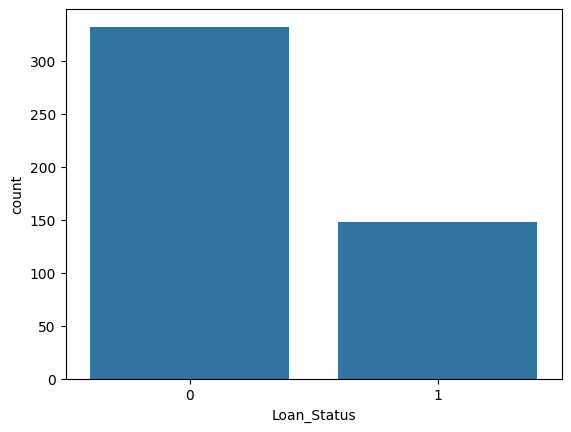

In [18]:
sns.countplot(x='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

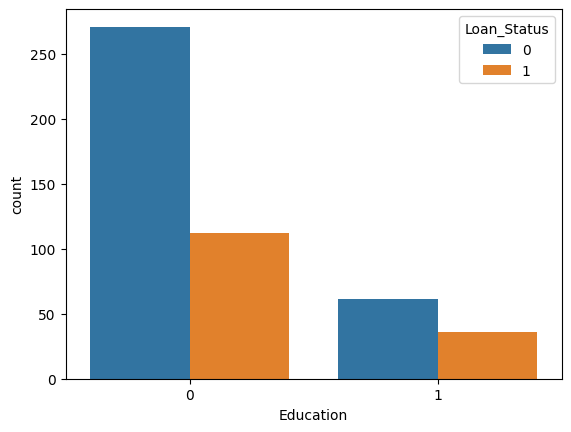

In [19]:
sns.countplot(x='Education',hue = 'Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

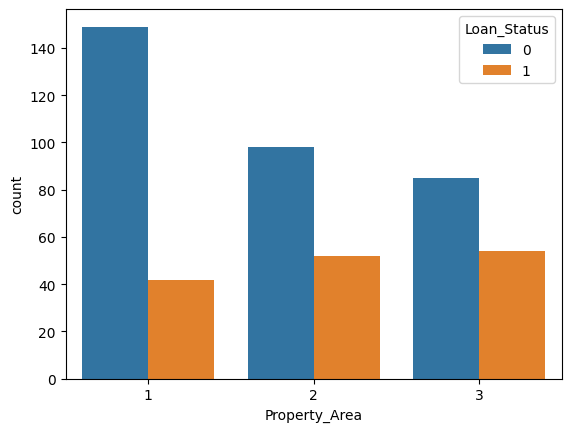

In [20]:
sns.countplot(x='Property_Area',hue = 'Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

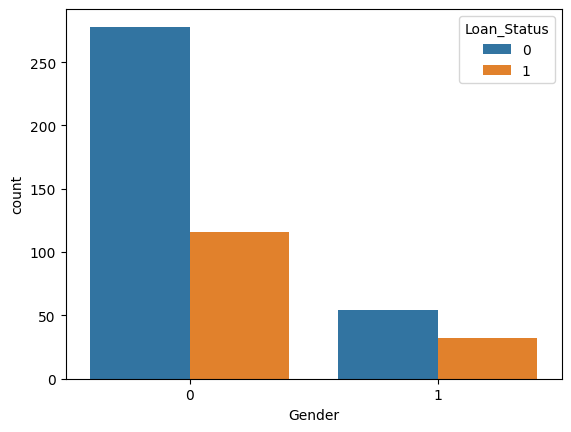

In [21]:
sns.countplot(x='Gender',hue = 'Loan_Status',data=df)

# **Setting X and Y**

In [22]:
X = df.drop(columns = ['Loan_ID','Loan_Status'],axis = 1)
Y = df['Loan_Status']

In [23]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        0          1          0              0             4583   
2         0        0          0          0              1             3000   
3         0        0          0          1              0             2583   
4         0        1          0          0              0             6000   
5         0        0          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        1          0          0              0             2900   
610       0        0          4          0              0             4106   
611       0        0          1          0              0             8072   
612       0        0          2          0              0             7583   
613       1        1          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [24]:
print(Y)

1      1
2      0
3      0
4      0
5      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 480, dtype: int64


# **Train Test Split**

In [25]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1,stratify = Y,random_state =2)

# **Model Selection and Training**

In [26]:
classifier = svm.SVC(kernel = 'linear')

In [27]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [28]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [29]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8032407407407407


In [32]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [33]:
print('Accuracy on testing data : ', test_data_accuracy)

Accuracy on testing data :  0.7291666666666666
